### CNN in KERAS FOR MNIST CLASSIFIER

In [1]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


##### here we have three color channels 

In [4]:
print('dimensions of X_train:' + str(X_train[0].shape))
print('dimensions of X_test:' + str(X_test[0].shape))

dimensions of X_train:(32, 32, 3)
dimensions of X_test:(32, 32, 3)


In [5]:
print('labels in y_train:{}'.format(y_train.shape))
print('labels in y_test:{}'.format(y_test.shape))

labels in y_train:(50000, 1)
labels in y_test:(10000, 1)


### PLOTTING IMAGES WITH MATPLOTLIB 

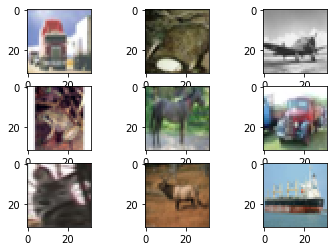

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# plt.subplot(331)
# random_num = np.random.randint(0,len(X_train))
# plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

for i in range(1,10):
    plt.subplot(330+i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

plt.show()
    

### STEP 3A = Prepare our dataset for training

In [7]:
# # lets store the number of rows and columns
# print(X_train.shape)
# img_rows = X_train.shape[1]
# img_cols = X_train.shape[2]
# print(str(img_cols) + "," + str(img_rows))
# print(X_train.shape[0], 'train samples')
# print(X_test.shape[0], 'test samples')

We don't need to reshape array into 4 dimensions because it is already in 4 dimensions, so now just normalize in float32

In [8]:
# change image from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

##### normalize data changing its range from (0,255) to (0,1)

In [9]:
X_train /= 255.
X_test /= 255.

In [10]:
print('x_train_shape: {}'.format(X_train.shape))
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train_shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### USE ONE HOT ENCODER TO CHANGE LABEL FOR CLASSIFIERS

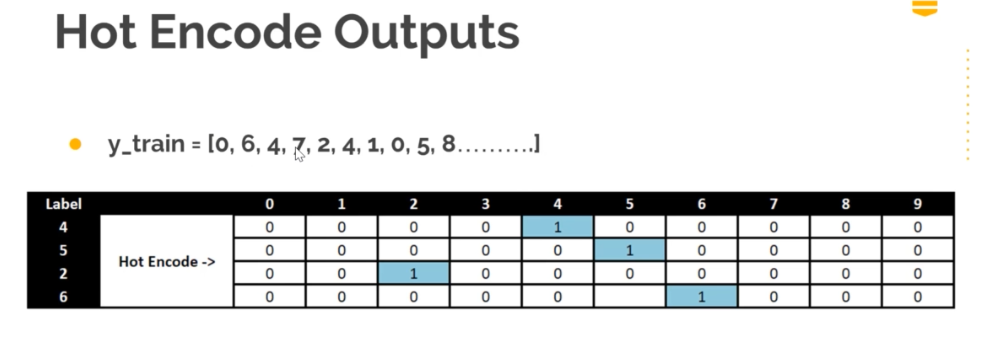

In [11]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

print('num of classes: ' + str(y_test_oh.shape[1]))

num_classes = y_test_oh.shape[1]
# num_pixel = X_train.shape[1] * X_train.shape[2]

num of classes: 10


##### define convolutional model

In [12]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [13]:
def convnet():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        
        Conv2D(63, (3,3) , activation='relu', padding='same'),
        Conv2D(63, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [14]:
model = convnet()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 63)        18207     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 63)        35784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 63)          0

In [15]:
batch_size = 32
num_classes = 10
epochs = 50

In [16]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(lr=0.001),
             metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train_oh, batch_size=batch_size,
                   epochs=epochs,
                   validation_data = (X_test, y_test_oh),
                   shuffle=True, verbose=1)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - ETA: 0s - loss: 1.5356 - accuracy: 0.4394WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f7b470d4320> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

1563/1563 [==============================] - 6s 4ms/step - loss: 0.3914 - accuracy: 0.8638 - val_loss: 0.7251 - val_accuracy: 0.7843
Epoch 45/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3941 - accuracy: 0.8649 - val_loss: 0.6702 - val_accuracy: 0.7943
Epoch 46/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3929 - accuracy: 0.8654 - val_loss: 0.7066 - val_accuracy: 0.7836
Epoch 47/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3856 - accuracy: 0.8651 - val_loss: 0.7285 - val_accuracy: 0.7825
Epoch 48/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3779 - accuracy: 0.8693 - val_loss: 0.6851 - val_accuracy: 0.7836
Epoch 49/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3843 - accuracy: 0.8661 - val_loss: 0.6842 - val_accuracy: 0.7913
Epoch 50/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3780 - accuracy: 0.8677 - val_loss: 0.6721 - val_accuracy: 0.79

In [18]:
scores = model.evaluate(X_test, y_test_oh, batch_size=256, verbose=1)
print("test result: {} loss: {}".format(scores[1]*100, scores[0]))

40/40 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.7954
test result: 79.54000234603882 loss: 0.6721419095993042


In [19]:
!ls ../checkpoints

cifar-10-custom-cnn-model.h5  mnist_cnn_10_epochs.h5  monkey_breed_mobilenet.h5


In [20]:
model.save('../checkpoints/cifar-10-custom-cnn-model.h5')

In [21]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [22]:
y_pred_labels = np.argmax(y_pred, axis=1)

load labels from dataset instead of manual

In [23]:
labels = {0: "airplane",
          1: "automobile",
          2: "bird",
          3: "cat",
          4: "deer",
          5: "dog",
          6: "frog",
          7: "horse",
          8: "ship",
          9: "truck"}

## CONFUSION MATRIX 

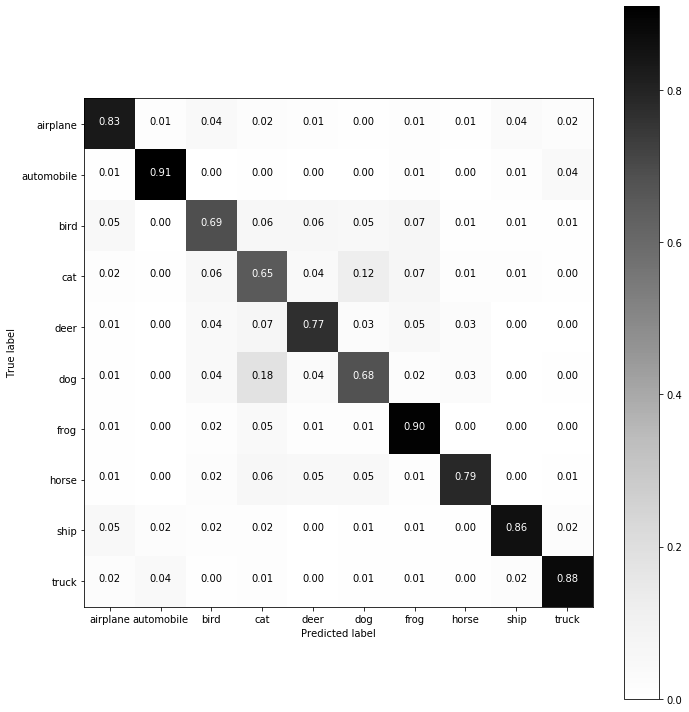

In [24]:
import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_labels)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)

plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
tick_marks = np.arange(10)

plt.xticks(tick_marks, [labels[i] for i in range(10)])
plt.yticks(tick_marks, [labels[i] for i in range(10)])
fmt='.2f'

thresh=cm.max()/2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show();

In [25]:
history.history

{'loss': [1.5356436967849731,
  1.154695749282837,
  0.9944545030593872,
  0.9020106792449951,
  0.8366689682006836,
  0.7765534520149231,
  0.7398099899291992,
  0.7033510804176331,
  0.6767119765281677,
  0.6492223143577576,
  0.6262040734291077,
  0.6116830706596375,
  0.5943083763122559,
  0.573782205581665,
  0.5576528310775757,
  0.5447565913200378,
  0.5325568318367004,
  0.5294150114059448,
  0.5217538475990295,
  0.5076894760131836,
  0.5023329854011536,
  0.4970722794532776,
  0.48899489641189575,
  0.4846300482749939,
  0.47286540269851685,
  0.4685197174549103,
  0.46680909395217896,
  0.46029430627822876,
  0.4533802270889282,
  0.4397274851799011,
  0.43914395570755005,
  0.4331008195877075,
  0.43206921219825745,
  0.4209194779396057,
  0.4277268648147583,
  0.4211256206035614,
  0.415987491607666,
  0.41519632935523987,
  0.40909233689308167,
  0.4071296155452728,
  0.40103527903556824,
  0.3958122730255127,
  0.39949968457221985,
  0.39143821597099304,
  0.394110590219

Text(0.5, 1.0, 'Accuracy Curves')

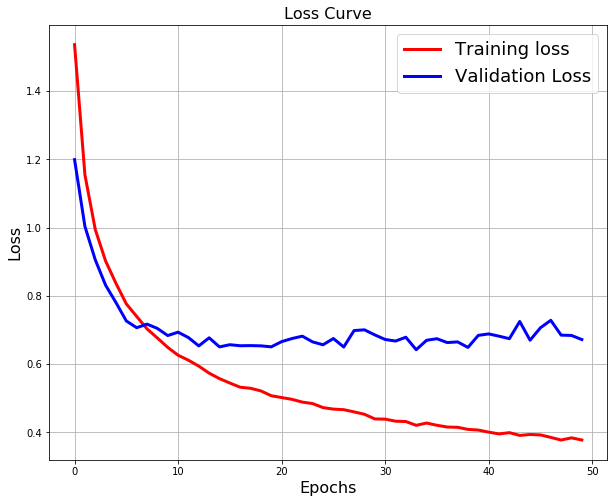

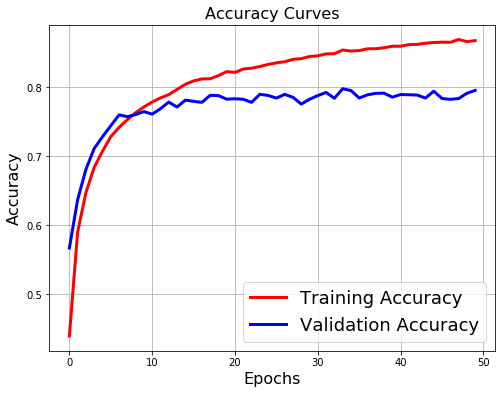

In [26]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize = 18)
plt.grid()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curve', fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.grid()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

## TRAIN CNN Model 

In [27]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
classifier = load_model('../checkpoints/cifar-10-custom-cnn-model.h5')
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
              
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Generate the plot
plot_model(model, to_file ='model_plot_cifar10_cnn.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot_cifar10_cnn.png')
plt.figure(figsize=(30,18))
imgplot = plt.imshow(img)

